# Figure 4. SRSF3 induces alternative processing and prevents nick processing
B. Volcano plot for pri-mir-142 from MS

In [4]:
import time
today = time.strftime('%Y-%m-%d')
name = 'Seungchan Baek'
print 'Last revised by %s at %s.' % (name, today)

Last revised by Seungchan Baek at 2020-12-29.


In [5]:
home = '/casa/bsc/projects/1_DCS/2004_paper_prep/'
%cd $home

/casa/bsc/projects/1_DCS/2004_paper_prep


In [21]:
from __future__ import division
import sys; sys.path.append('/casa/bsc/notebooks/')
from basic import gen_result_dir
from util import *
resultpath = gen_result_dir('results/')
print 'resultpath:', resultpath

resultpath: results/201229/


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
mstbl1 = pd.read_csv('supplementary/MS/142_vs_No bait_all.csv', index_col=0)
mstbl2 = pd.read_csv('supplementary/MS/17_vs_No bait_all.csv', index_col=0)
ms1 = mstbl1[['log2FC','P.Value','adj.P.Val']]
ms2 = mstbl2[['log2FC','P.Value','adj.P.Val']]
msjoin = ms1.join(ms2,how='outer',lsuffix='_mir142',rsuffix='_mir17')
msjoin = msjoin.sort_values('adj.P.Val_mir142')
msjoin.head()

,log2FC_mir142,P.Value_mir142,adj.P.Val_mir142,log2FC_mir17,P.Value_mir17,adj.P.Val_mir17
genes,,,,,,
SRSF3,4.649891,0.000010,0.001701,2.392470,0.007546,0.045274
ILF3,4.082434,0.000036,0.001959,0.696496,0.177904,0.343100
RPL27A,3.240463,0.000032,0.001959,2.511979,0.000153,0.005522
ILF2,2.909337,0.000150,0.006120,1.336814,0.114950,0.255095
RPS9,3.827202,0.000766,0.014647,4.343491,0.001901,0.017772


In [32]:
msjoin.to_csv('supplementary/201123_s8__Mass_analysis.csv')

## Volcano plot for pri-mir-142 from MS

In [14]:
#mstbl = pd.read_csv('supplementary/MS/142_vs_No bait_all.csv', index_col=0)
mstbl = pd.read_csv('supplementary/MS/17_vs_No bait_all.csv', index_col=0)
mstbl.head()

,log2FC,AveExpr,EffSize,t,P.Value,adj.P.Val
genes,,,,,,
GNL3,3.489669,9.693243,7.231195,7.632254,0.000239,0.005522
RBM39,-3.791433,8.446697,7.572127,-8.003826,0.000183,0.005522
RPL35,4.458971,13.482809,6.200467,9.076313,0.000089,0.005522
RPL27A,2.511979,10.383807,6.258778,8.254291,0.000153,0.005522
HNRNPM,2.594470,15.165240,5.951707,9.579872,0.000065,0.005522


In [8]:
# mir-142
xs = mstbl['log2FC']
ys = -np.log10(mstbl['adj.P.Val'])
lw = .8
s = 15
color, ecolor, colorsub = '#464646', 'black', 'tab:red'
alpha = .7
proteins = mstbl[(mstbl['log2FC']>=2)&(mstbl['adj.P.Val']<.05)].index
xssub = mstbl.loc[proteins, 'log2FC']
yssub = -np.log10(mstbl.loc[proteins,'adj.P.Val'])
ymin, ymax = -.1, 3
xmin, xmax = -3.7, 5
cutx, cuty = 2, -np.log10(.005)
print len(xs)

163


In [18]:
# mir-17
xs = mstbl['log2FC']
ys = -np.log10(mstbl['adj.P.Val'])
lw = .8
s = 15
color, ecolor, colorsub = '#464646', 'black', 'tab:red'
alpha = .7
proteins = mstbl[(mstbl['log2FC']>=2)&(mstbl['adj.P.Val']<.05)].index
xssub = mstbl.loc[proteins, 'log2FC']
yssub = -np.log10(mstbl.loc[proteins,'adj.P.Val'])
ymin, ymax = -.07, 2.4
xmin, xmax = -4.2, 5
cutx, cuty = 2, -np.log10(.005)

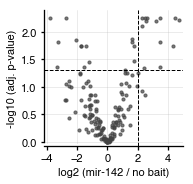

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(2.5,2.5))
ax.scatter(xs, ys, s=10, color='#424242', zorder=2, alpha=.7, rasterized=True)
#ax.scatter(xssub, yssub, s=10, color='#de2d26', zorder=2, alpha=.7, rasterized=True)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('log2 (mir-142 / no bait)')
ax.set_ylabel('-log10 (adj. p-value)')
ax.spines['left'].set_bounds(0, ymax)
ax.set_xticks(range(-4,5,2))

sq = plt.Rectangle((xmin,-.03), xmax-xmin, ymax+.05, fc='white', alpha=.3); ax.add_patch(sq)
ax.grid(ls='-', lw=.5, clip_path=sq)
ax.axhline(-np.log10(.05),color='k',ls='--',lw=1)
ax.axvline(2,color='k',ls='--',lw=1)
# ax.text(4.9, 2.8, 'SRSF3'); ax.text(4.05,2.45,'ILF3')
# ax.text(3.2,2.15,'ILF2'); ax.text(3.6,1.9,'RPL26; RPS9')
# ax.text(1.4,2.8,'RPL27A',bbox={'pad':0,'facecolor':'w','alpha':.8,'lw':0})
# ax.text(1.6,1.8,'RPL17',bbox={'pad':0,'facecolor':'w','alpha':.8,'lw':0})
# ax.text(2.1,1.5,'RPS6',ha='right',bbox={'pad':.1,'facecolor':'w','alpha':.8,'lw':0})
# ax.text(2.5,1.33,'GNL3',bbox={'pad':.1,'facecolor':'w','alpha':.8,'lw':0})
# ax.plot([3.4,4.25], [1.63, 1.7], 'k--', lw=1)
# ax.text(4.3, 1.65, 'ADAR'); ax.text(3.9,1.45,'HNRNPH2; RPL35')
fig.savefig(resultpath+'201123_f4b__ms_enrichment_mir17.pdf',dpi=300)

In [ ]:
mstbl = pd.read_csv('supplementary/MS/(Nuclear extract) 142vs125a.csv', index_col=0)
mstbl.head(3)

In [38]:
mstbl[(mstbl['log2FC']>2)&(mstbl['adj.P.Val']<.05)]

,log2FC,AveExpr,EffSize,t,P.Value,adj.P.Val
genes,,,,,,
TOE1,2.299270,10.907029,4.825584,8.719103,0.000071,0.007401
EIF2AK2,2.389993,11.029209,4.686249,8.056826,0.000116,0.008009
HNRNPH2,2.539137,9.889422,3.353968,5.446817,0.001143,0.029708
CELF1,2.628086,8.098016,4.321345,4.899142,0.002039,0.044615


In [25]:
xs = mstbl['log2FC']
ys = -np.log10(mstbl['adj.P.Val'])
lw = .8
s = 15
color, ecolor, colorsub = '#464646', 'black', 'tab:red'
alpha = .7
proteins = mstbl[(mstbl['log2FC']>=2)&(mstbl['adj.P.Val']<.05)].index
xssub = mstbl.loc[proteins, 'log2FC']
yssub = -np.log10(mstbl.loc[proteins,'adj.P.Val'])
ymin, ymax = -.1, 3
xmin, xmax = -3.7, 5
cutx, cuty = 2, -np.log10(.005)
print len(xs)

208


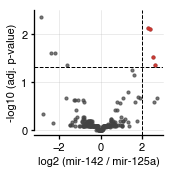

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(2.3,2.3))
ax.scatter(xs, ys, s=10, color='#424242', zorder=2, alpha=.7, rasterized=True)
ax.scatter(xssub, yssub, s=10, color='#de2d26', zorder=2, alpha=.7, rasterized=True)

ax.set_xlim(-3.2, 3)
ax.set_ylim(ymin, 2.5)
ax.set_xlabel('log2 (mir-142 / mir-125a)')
ax.set_ylabel('-log10 (adj. p-value)')
ax.spines['left'].set_bounds(0, 2.5)
ax.set_xticks(range(-2,3,2))

sq = plt.Rectangle((xmin,-.03), xmax-xmin, ymax+.05, fc='white', alpha=.3); ax.add_patch(sq)
ax.grid(ls='-', lw=.5, clip_path=sq)
ax.axhline(-np.log10(.05),color='k',ls='--',lw=1)
ax.axvline(2,color='k',ls='--',lw=1)
# ax.text(4.9, 2.8, 'SRSF3'); ax.text(4.05,2.45,'ILF3')
# ax.text(3.2,2.15,'ILF2'); ax.text(3.6,1.9,'RPL26; RPS9')
# ax.text(1.4,2.8,'RPL27A',bbox={'pad':0,'facecolor':'w','alpha':.8,'lw':0})
# ax.text(1.6,1.8,'RPL17',bbox={'pad':0,'facecolor':'w','alpha':.8,'lw':0})
# ax.text(2.1,1.5,'RPS6',ha='right',bbox={'pad':.1,'facecolor':'w','alpha':.8,'lw':0})
# ax.text(2.5,1.33,'GNL3',bbox={'pad':.1,'facecolor':'w','alpha':.8,'lw':0})
# ax.plot([3.4,4.25], [1.63, 1.7], 'k--', lw=1)
# ax.text(4.3, 1.65, 'ADAR'); ax.text(3.9,1.45,'HNRNPH2; RPL35')
fig.savefig(resultpath+'201118_f4b__ms_enrichment_mir142_v2.pdf',dpi=300)

## Volcano plot for pri-mir-17 from MS

In [8]:
mstbl = pd.read_csv('supplementary/MS/17_vs_No bait_all.csv', index_col=0)
mstbl.head()

,log2FC,AveExpr,EffSize,t,P.Value,adj.P.Val
genes,,,,,,
GNL3,3.489669,9.693243,7.231195,7.632254,0.000239,0.005522
RBM39,-3.791433,8.446697,7.572127,-8.003826,0.000183,0.005522
RPL35,4.458971,13.482809,6.200467,9.076313,0.000089,0.005522
RPL27A,2.511979,10.383807,6.258778,8.254291,0.000153,0.005522
HNRNPM,2.594470,15.165240,5.951707,9.579872,0.000065,0.005522


In [9]:
xs = mstbl['log2FC']
ys = -np.log10(mstbl['adj.P.Val'])
lw = .8
s = 15
color, ecolor, colorsub = '#464646', 'black', 'tab:red'
alpha = .7
proteins = mstbl[(mstbl['log2FC']>=2)&(mstbl['adj.P.Val']<.05)].index
xssub = mstbl.loc[proteins, 'log2FC']
yssub = -np.log10(mstbl.loc[proteins,'adj.P.Val'])
ymin, ymax = -.07, 2.4
xmin, xmax = -3.7, 5
cutx, cuty = 2, -np.log10(.005)

In [10]:
mstbl[(mstbl['log2FC']>2)&(mstbl['adj.P.Val']<.05)].sort_values(['adj.P.Val','log2FC'])

,log2FC,AveExpr,EffSize,t,P.Value,adj.P.Val
genes,,,,,,
HIST1H1C,2.275204,12.969666,4.914891,7.826909,0.000207,0.005522
RPL27A,2.511979,10.383807,6.258778,8.254291,0.000153,0.005522
HNRNPM,2.594470,15.165240,5.951707,9.579872,0.000065,0.005522
GNL3,3.489669,9.693243,7.231195,7.632254,0.000239,0.005522
RPL35,4.458971,13.482809,6.200467,9.076313,0.000089,0.005522
TRA2B,4.722037,11.217765,5.006066,7.322286,0.000301,0.006093
RPS6,2.522442,13.548230,4.276460,7.020278,0.000380,0.006363
TRA2A,3.214741,7.740962,6.057833,6.978928,0.000393,0.006363
HIST1H4A,2.280144,15.316241,4.356849,6.622807,0.000524,0.007714


Text(2.6,1.1,u'SRSF3')

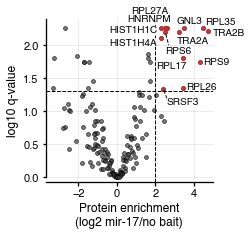

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.scatter(xs, ys, s=s, facecolor=color, edgecolor=ecolor, lw=lw, alpha=alpha, zorder=2)
ax.scatter(xssub, yssub, s=s, color=colorsub, alpha=alpha, zorder=2)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('Protein enrichment\n(log2 mir-17/no bait)', fontsize=12)
ax.set_ylabel('log10 q-value', fontsize=12)
ax.spines['left'].set_bounds(0, ymax)
ax.axhline(-np.log10(.05),color='k',ls='--',lw=1)
ax.axvline(2,color='k',ls='--',lw=1)
sq = plt.Rectangle((xmin,-.03), xmax-xmin, ymax+.05, fc='white', alpha=.3); ax.add_patch(sq)
ax.grid(ls='-', lw=.5, clip_path=sq)

ax.text(5,2.15,'TRA2B'); ax.text(4.6,2.31,'RPL35'); ax.text(3.1,2.33,'GNL3')
ax.text(3.1,2.02,'TRA2A'); ax.text(2.05,1.64,'RPL17'); ax.text(4.5,1.7,'RPS9')
ax.text(3.6,1.33,'RPL26'); ax.text(2.5,1.88,'RPS6'); ax.plot([2.55,2.7],[2.17,2],'k--',lw=1)
ax.text(2.1,2.19,'HIST1H1C',ha='right',bbox={'pad':.1,'facecolor':'w','alpha':.8,'lw':0})
ax.text(2.1,2,'HIST1H4A',ha='right',bbox={'pad':.1,'facecolor':'w','alpha':.8,'lw':0})
ax.text(1.7,2.35,'RPL27A\nHNRNPM', bbox={'pad':.1,'facecolor':'w','alpha':.8,'lw':0},
        ha='center',linespacing=.9)
ax.plot([2.45,2.6],[1.32,1.2],'k--',lw=1)
ax.text(2.6, 1.1, 'SRSF3', bbox={'pad':.1,'facecolor':'w','alpha':.8,'lw':0})
#fig.savefig(resultpath+'200909_f4e__ms_enrichment_mir17.pdf')

## TCGA data

In [1]:
from os import listdir
from scipy.stats import spearmanr, sem
from matplotlib import lines

In [2]:
ncancer = 10
nmirs = 200

In [9]:
tcgapath = 'supplementary/TCGA'
cancers = [ fo for fo in listdir(tcgapath) if not fo.startswith('.') ]
print len(cancers)

32


In [10]:
exptbls = {}
for cancer in cancers:
    fname = [ f for f in listdir('%s/%s'%(tcgapath,cancer)) if f.endswith('uq') ][0]
    tbl = pd.read_table('%s/%s/%s'%(tcgapath, cancer, fname), index_col=0)
    tbl.index = [ i.split('|')[0] for i in tbl.index ]
    exptbls[cancer] = tbl

In [11]:
def get_corrs(protein):
    tblr, tblp = pd.DataFrame(), pd.DataFrame()
    for cancer in cancers:
        exps = exptbls[cancer]
        if protein not in exps.index:
            continue
        mats = [ m for m in exps.index if m.startswith('hsa-') and ' ' not in m ]
        robust = sorted(mats,key=lambda x: np.average(exps.loc[x]))[-nmirs:]
        for m in robust:
            r, p = spearmanr(exps.loc[protein], exps.loc[m])
            tblr.loc[m, cancer] = r
            tblp.loc[m, cancer] = p
    return tblr, tblp

In [111]:
'SLC29A1' in exptbls['ucs'].index

True

In [12]:
tr = get_corrs('SFRS3')[0]
tr = tr[tr.apply(lambda x: len(x.dropna())>=ncancer, axis=1)]
tr['average'] = tr.mean(axis=1)
tr['sem'] = tr.apply(lambda x: sem(x.dropna()[:-1]), axis=1)
tr = tr.sort_values('average')

In [13]:
tr.tail()

,ucec,ucs,uvm,stad,tgct,thca,thym,read,sarc,skcm,...,coad,dlbc,esca,brca,cesc,chol,acc,blca,average,sem
hsa-miR-15b-3p,0.356905,0.173001,NaN,0.181901,NaN,NaN,0.780088,0.414198,0.209748,NaN,...,0.289507,0.164223,0.124449,0.227199,0.255343,-0.278250,NaN,0.227469,0.234094,0.047167
hsa-miR-19a-3p,0.279753,0.409638,NaN,0.504759,NaN,NaN,0.750323,0.237906,NaN,NaN,...,0.365930,-0.100073,0.261396,NaN,-0.097520,NaN,NaN,NaN,0.243113,0.067868
hsa-miR-19b-3p,0.254217,0.476692,0.203149,0.411165,0.100145,0.108162,0.652089,0.110823,0.348373,0.306348,...,0.266100,-0.121701,0.252191,0.306327,0.006876,0.435779,NaN,0.324311,0.244313,0.031293
hsa-miR-20a-5p,0.342211,0.454135,0.267676,0.511219,0.173684,-0.055993,0.751821,0.299642,0.209886,0.245465,...,0.322085,0.271994,0.293398,0.333974,0.011874,0.170914,-0.057814,0.393586,0.252394,0.031290
hsa-miR-17-5p,0.451386,0.452632,0.291401,0.546626,0.242345,-0.024164,0.754274,0.419536,0.256521,0.356494,...,0.380559,0.379399,0.341848,0.385442,0.094536,0.130245,0.051388,0.386880,0.285888,0.031300


In [14]:
title = 'SRSF3'
ys = tr['average'].tolist()
xs = range(len(ys))
yerrs = tr['sem'].tolist()
xmin, xmax = -5, len(xs)+1
ymin, ymax = -max(map(abs, ys))-.01, max(map(abs, ys))+.01
lw = 1.8
s = 10
color = 'black'
zoom = 10
zoomwhich = 'top'
colors = ['black','tab:red'] + ['black']*7 + ['tab:red']
txts = [ m.replace('hsa-miR-','') for m in tr.index[-zoom:] ]

In [15]:
len(xs)

220

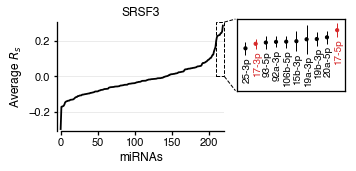

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(3,2))
ax.plot(xs, ys, lw=lw, c=color)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('miRNAs', fontsize=12)
ax.set_ylabel(r'Average $R_s$', fontsize=12)
ax.spines['bottom'].set_bounds(0, len(ys))
ax.set_title(title, fontsize=12)
gr = plt.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, fc='w'); ax.add_patch(gr)
ax.yaxis.grid(ls='-', lw=.5, clip_path=gr)

if zoomwhich=='top':
    ymid, ymin2, ymax2 = 0, 0, max(np.array(ys[-zoom:])+np.array(yerrs[-zoom:]))+.02
    sq = plt.Rectangle((len(xs)-zoom,ymid), zoom+1, ymax-ymid, lw=1, ls='--', 
                       edgecolor='k', facecolor='None')
    l1 = lines.Line2D([xmax,xmax+15], [ymid,-.08], lw=1, ls='--', color='k')
    l2 = lines.Line2D([xmax,xmax+15], [ymax,ymax+.017], lw=1, ls='--', color='k')
    ax2loc = [.96, .4, .5, .5]
    yzoom = ys[-zoom:]
    ezoom = yerrs[-zoom:]
    
else: # bottom
    ymid, ymin2, ymax2 = ys[zoom], ymin, ys[zoom]
    sq = plt.Rectangle((-1,ymid), zoom+1, ymin-ymid-.01, lw=1, ls='--', 
                       edgecolor='k', color='None')
    l1 = lines.Line2D([zoom,xmax+16], [ymid,0], lw=1, color='k', ls='--')
    l2 = lines.Line2D([zoom,xmax+16], [ymin,ymin], lw=1, color='k', ls='--')
    ax2loc = [.96, .14, .5, .5]
    yzoom = ys[:zoom]
    ezoom = ys[:zoom]
       
sq.set_clip_on(False); ax.add_patch(sq); sq.set_zorder(3)
l1.set_clip_on(False); ax.add_line(l1)
l2.set_clip_on(False); ax.add_line(l2)

ax2 = fig.add_axes(ax2loc, ax)
ax2.scatter(range(zoom), yzoom, s=s, color=colors)
ax2.errorbar(range(zoom), yzoom, yerr=ezoom, lw=0, elinewidth=1, ecolor=colors)
ax2.set_xlim(-.8, zoom-.2)
ax2.set_ylim(ymin2, ymax2)
ax2.set_xticks([])
ax2.set_yticks([])

if zoomwhich=='top':
    ax2.spines['top'].set_visible(True)
    ax2.spines['right'].set_visible(True)
    for i, mir, y, c, err in zip(range(zoom), txts, yzoom, colors, ezoom):
        ax2.text(i-.3, y-err-.01, mir, fontsize=10, rotation=90, va='top', color=c)
else:
    for i, mir, y, c, err in zip(range(zoom), txts, yzoom, colors, ezoom):
        ax2.text(i-.3, y+err+.01, mir, fontsize=10, rotation=90, va='bottom', color=c)
#fig.savefig(resultpath + '200617_s4_tcga_%s.pdf'%title)

In [112]:
tr = get_corrs('SLC29A1')[0]
tr = tr[tr.apply(lambda x: len(x.dropna())>=ncancer, axis=1)]
tr['average'] = tr.mean(axis=1)
tr['sem'] = tr.apply(lambda x: sem(x.dropna()[:-1]), axis=1)
tr = tr.sort_values('average')

In [123]:
for cancer in cancers:
    if 'SLC29A1' in exptbls[cancer].index:
        print cancer, np.average(exptbls[cancer].loc['SLC29A1'])

ucec 1207.1114115606938
ucs 1889.3601553571427
uvm 989.3020185714286
stad 1786.9180789940829
tgct 3408.9027426666667
thca 1332.2550901408451
thym 1926.249657777778
read 1994.8504958904111
sarc 1945.076494941634
skcm 3058.525623646724
paad 2169.115667977528
pcpg 5131.033098324023
prad 581.8407035555556
lusc 1265.1906540880505
meso 1017.23882
ov 1606.3778986206896
lihc 3377.030065395095
luad 1768.3330201456313
laml 1225.8401244047618
lgg 571.2933435546875
hnsc 1182.560898535565
kich 2378.1664909090914
kirc 1368.4244251999999
kirp 1352.1451467680608
coad 1979.8972186813187
dlbc 2162.569409375
esca 1393.021355737705
brca 2670.248292265943
cesc 1229.9942194078947
chol 3997.2722944444445
acc 3044.5161531645567
blca 1890.7067783475782


In [130]:
tmp = exptbls['ov']
#tmp = tmp[tmp['hsa-miR-6737-3p']>=5].T
xs = tmp.loc['SLC29A1']
ys = tmp.loc['hsa-miR-6737-3p']
pearsonr(xs,ys)

(0.11402014295941001, 0.05242381352956489)

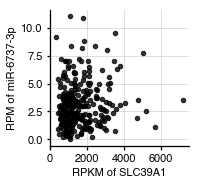

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(2.5,2.5))
ax.scatter(xs,ys,color='k',s=20,zorder=2,alpha=.8)
ax.set_xlabel('RPKM of SLC39A1')
ax.set_ylabel('RPM of miR-6737-3p')
ax.grid(ls='-')
fig.savefig(resultpath + 'tmp.png',dpi=300)

In [138]:
resultpath

'results/201229/'

In [96]:
s1 = pd.read_csv('supplementary/201123_s1__DROSHA_dependency.csv', header=1, index_col=0)
s2 = pd.read_csv('supplementary/201123_s2__Construct.csv', header=1, index_col=0).fillna('')
s3 = pd.read_csv('supplementary/210111_s3__DROSHA_processing_result.csv', header=1, index_col=0)
s4 = pd.read_csv('supplementary/201123_s4__MiRNA_features.csv', header=1, index_col=0)
s5 = pd.read_csv('supplementary/201123_s5__Nick_processing.csv', header=1, index_col=0)
s6 = pd.read_csv('supplementary/201123_s6__Inverted_processing.csv', header=1, index_col=0)
s7 = pd.read_csv('supplementary/210111_s7__DROSHA_processing_with_SRSF3.csv',
                 header=1, index_col=0)

In [98]:
EFFCUT = 1.5
HOMCUT = .25
effsmp = s3['Cleavage Efficiency'].to_dict()
homsmp = s3['Cleavage Homogeneity'].to_dict()
dcsmirsmp = [ m for m in s3.index if effsmp[m]>=EFFCUT and homsmp[m]>=HOMCUT ]
nodcsmp = [ m for m in s3.index if m not in dcsmirsmp ]
print len(s3.index), len(dcsmirsmp), len(nodcsmp)

1816 560 1256


In [99]:
effs = s7['Cleavage Efficiency'].to_dict()
homs = s7['Cleavage Homogeneity'].to_dict()
dcsmirs = [ m for m in s7.index if effs[m]>=EFFCUT and homs[m]>=HOMCUT ]
nodcs = [ m for m in s7.index if m not in dcsmirs ]
print len(s7.index), len(dcsmirs), len(nodcs)

1812 747 1065


In [100]:
primat = {}
for pri, row in annpri.iterrows():
    matureDerives = anntbl[anntbl['Derives_from']==row['ID']]
    primat[pri] = matureDerives['Name'].tolist()
print primat['hsa-mir-320a']

['hsa-miR-320a']


In [101]:
matpri = defaultdict(list)
for pri in primat:
    for mat in primat[pri]:
        matpri[mat].append(pri)
matpri['hsa-let-7a-5p']

['hsa-let-7a-3', 'hsa-let-7a-2', 'hsa-let-7a-1']

In [102]:
ms = tr.index
ms = [ m for m in ms if m in matpri and matpri[m][0] in overlap ]
ps = [ matpri[m][0] for m in ms ]
print len(ms), len(ps)

218 218


In [103]:
print 

['hsa-mir-25',
 'hsa-mir-17',
 'hsa-mir-93',
 'hsa-mir-92a-1',
 'hsa-mir-106b',
 'hsa-mir-15b',
 'hsa-mir-19a',
 'hsa-mir-19b-2',
 'hsa-mir-20a',
 'hsa-mir-17']

In [104]:
overlap = [ m for m in s3.index if m in s7.index ]
xs1 = range(len(ps))
ys1 = [ effs[m]-effsmp[m] for m in ps ]
yssub1 = [ effs[p]-effsmp[p] for i,p in enumerate(ps) if p in ['hsa-mir-17','hsa-mir-18a',
                            'hsa-mir-19a','hsa-mir-20a','hsa-mir-19b-1','hsa-mir-92a-1']]
xssub1 = [ i for i,p in enumerate(ps) if p in ['hsa-mir-17','hsa-mir-18a','hsa-mir-19a',
                            'hsa-mir-20a','hsa-mir-19b-1','hsa-mir-92a-1']]
print len(xs), len(ys), len(xssub), len(yssub)

218 218 5 5


In [105]:
overlap = [ m for m in s3.index if m in s7.index ]
xs2 = range(len(ps))
ys2 = [ homs[m]-homsmp[m] for m in ps ]
yssub2 = [ homs[p]-homsmp[p] for i,p in enumerate(ps) if p in ['hsa-mir-17','hsa-mir-18a',
                            'hsa-mir-19a','hsa-mir-20a','hsa-mir-19b-1','hsa-mir-92a-1']]
xssub2 = [ i for i,p in enumerate(ps) if p in ['hsa-mir-17','hsa-mir-18a','hsa-mir-19a',
                            'hsa-mir-20a','hsa-mir-19b-1','hsa-mir-92a-1']]
print len(xs), len(ys), len(xssub), len(yssub)

218 218 5 5


In [57]:
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

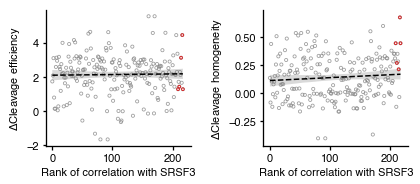

In [106]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(6.5,2.5))
fig.subplots_adjust(wspace=.5)
sns.regplot(x=xs1, y=ys1, color='#848484',                            
        scatter_kws={'s':10,'alpha':.8,'zorder':2,'rasterized':True,'facecolor':'None','lw':.8},
        line_kws={'ls':'--','lw':1.5,'color':'k'}, ci=95, ax=ax1)
ax1.scatter(xssub1,yssub1,s=7,color='tab:red',zorder=3,rasterized=True, facecolor='None',lw=1)
ax1.set_ylabel('$\Delta$Cleavage efficiency')
ax1.set_xlabel('Rank of correlation with SRSF3')

sns.regplot(x=xs2, y=ys2, color='#848484',                            
        scatter_kws={'s':10,'alpha':.8,'zorder':2,'rasterized':True,'facecolor':'None','lw':.8},
        line_kws={'ls':'--','lw':1.5,'color':'k'}, ci=95, ax=ax2)
ax2.scatter(xssub2,yssub2,s=7,color='tab:red',zorder=3,rasterized=True, facecolor='None',lw=1)
ax2.set_ylabel('$\Delta$Cleavage homogeneity')
ax2.set_xlabel('Rank of correlation with SRSF3')

fig.savefig(resultpath + 'tmp2.png',dpi=300)